In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px # Library for 3d viewing
import plotly.figure_factory as ff
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split as tt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

C:\Users\Vaibhav\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
ds = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')
ds

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
ds.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:
df = ds.drop(columns=['ADDRESSLINE2', 'STATE','TERRITORY'])
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [6]:
df.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
CITY                 0
POSTALCODE          76
COUNTRY              0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

In [427]:
df1 = df[pd.notnull(df['POSTALCODE'])]
df1

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004 00:00,Shipped,4,12,2004,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03-01-2005 00:00,Resolved,1,3,2005,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [428]:
df1.duplicated().count()

2747

In [429]:
df1.drop_duplicates()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004 00:00,Shipped,4,12,2004,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03-01-2005 00:00,Resolved,1,3,2005,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [430]:
df1.nunique()

ORDERNUMBER          298
QUANTITYORDERED       58
PRICEEACH            992
ORDERLINENUMBER       18
SALES               2690
ORDERDATE            246
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          89
PHONE                 88
ADDRESSLINE1          89
CITY                  71
POSTALCODE            73
COUNTRY               19
CONTACTLASTNAME       76
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

In [431]:
df1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [432]:
dfsns = df1.sample(100)
dfsns

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
159,10411,27,100.00,2,4427.73,05-01-2005 00:00,Shipped,2,5,2005,...,S10_4962,Quebec Home Shopping Network,(514) 555-8054,43 rue St. Laurent,Montreal,H1J 1C3,Canada,Fresnisre,Jean,Medium
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
2333,10180,22,100.00,7,2514.60,11-11-2003 00:00,Shipped,4,11,2003,...,S32_4485,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
1211,10363,32,89.12,12,2851.84,01-06-2005 00:00,Shipped,1,1,2005,...,S18_3782,Suominen Souveniers,+358 9 8045 555,"Software Engineering Center, SEC Oy",Espoo,FIN-02271,Finland,Suominen,Kalle,Small
2567,10178,22,87.75,1,1930.50,11-08-2003 00:00,Shipped,4,11,2003,...,S700_2466,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,10227,47,88.14,14,4142.58,03-02-2004 00:00,Shipped,1,3,2004,...,S24_2766,"Saveley & Henriot, Co.",78.32.5555,"2, rue du Commerce",Lyon,69004,France,Saveley,Mary,Medium
1070,10165,50,100.00,1,5344.50,10/22/2003 0:00,Shipped,4,10,2003,...,S18_3259,"Dragon Souveniers, Ltd.",+65 221 7555,"Bronz Sok., Bronz Apt. 3/6 Tesvikiye",Singapore,79903,Singapore,Natividad,Eric,Medium
1506,10288,50,52.32,13,2616.00,09-01-2004 00:00,Shipped,3,9,2004,...,S24_1628,Handji Gifts& Co,+65 224 1555,Village Close - 106 Linden Road Sandown,Singapore,69045,Singapore,Victorino,Wendy,Small
2520,10232,26,88.34,7,2296.84,3/20/2004 0:00,Shipped,1,3,2004,...,S700_1938,giftsbymail.co.uk,(198) 555-8888,Garden House Crowther Way,Cowes,PO31 7PJ,UK,Bennett,Helen,Small


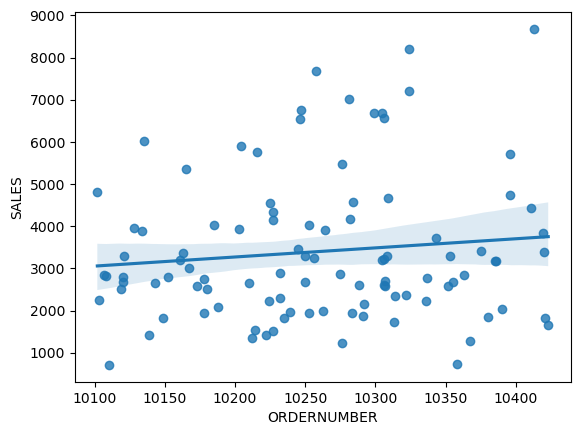

In [433]:
sns.regplot(x = 'ORDERNUMBER', y = 'SALES', data = dfsns);

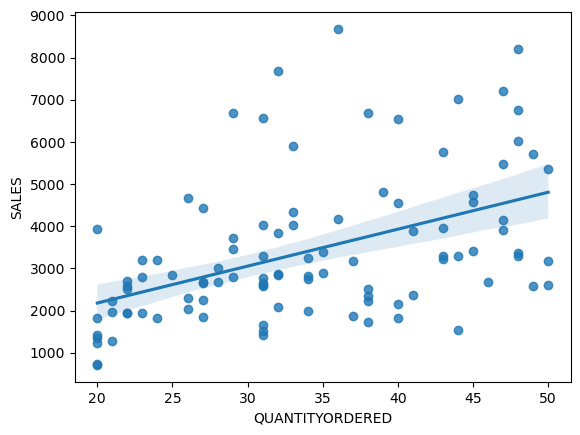

In [434]:
sns.regplot(x = 'QUANTITYORDERED', y = 'SALES', data = dfsns);

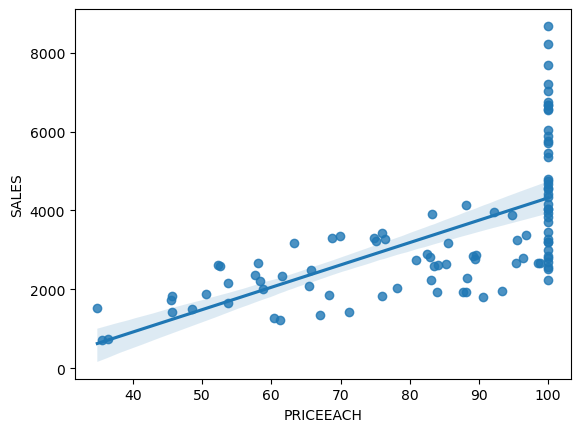

In [435]:
sns.regplot(x = 'PRICEEACH', y = 'SALES', data = dfsns);

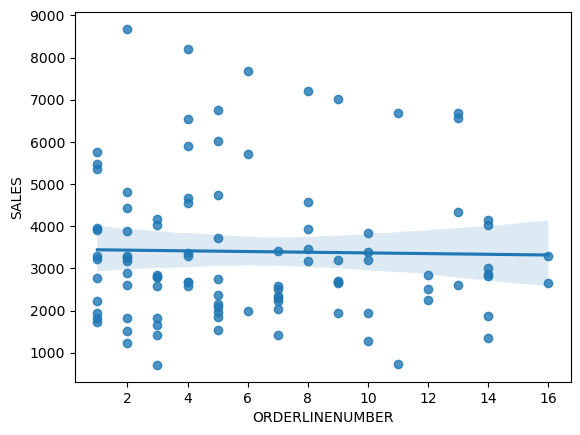

In [436]:
sns.regplot(x = 'ORDERLINENUMBER', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U16'), dtype('float64')) -> None

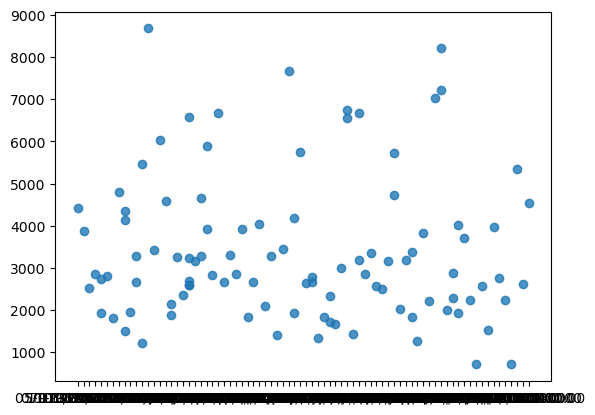

In [437]:
sns.regplot(x = 'ORDERDATE', y = 'SALES', data = dfsns);

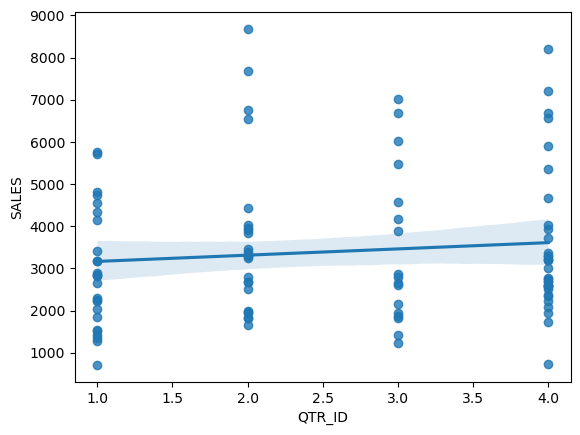

In [438]:
sns.regplot(x = 'QTR_ID', y = 'SALES', data = dfsns);

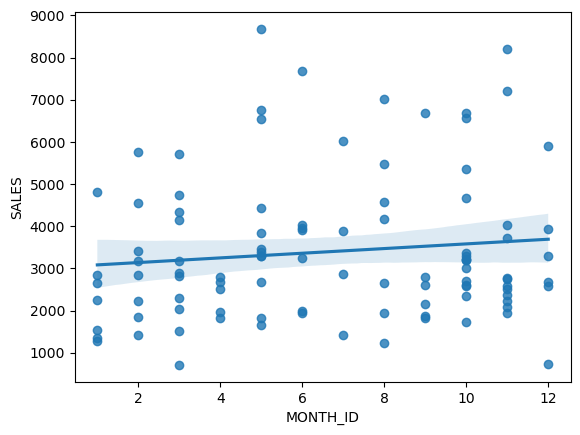

In [439]:
sns.regplot(x = 'MONTH_ID', y = 'SALES', data = dfsns);

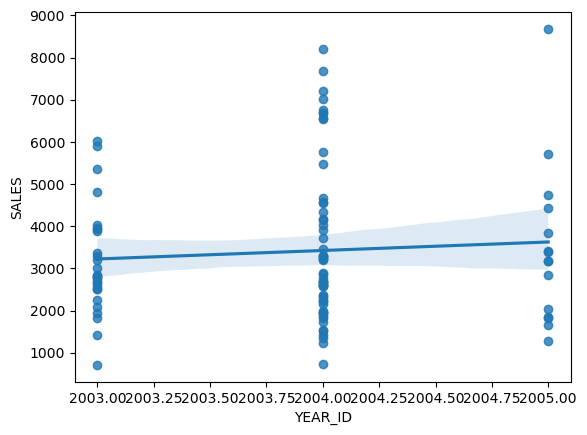

In [440]:
sns.regplot(x = 'YEAR_ID', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U12'), dtype('float64')) -> None

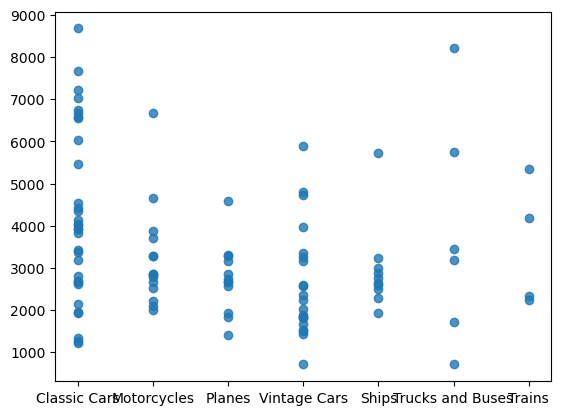

In [441]:
sns.regplot(x = 'PRODUCTLINE', y = 'SALES', data = dfsns);

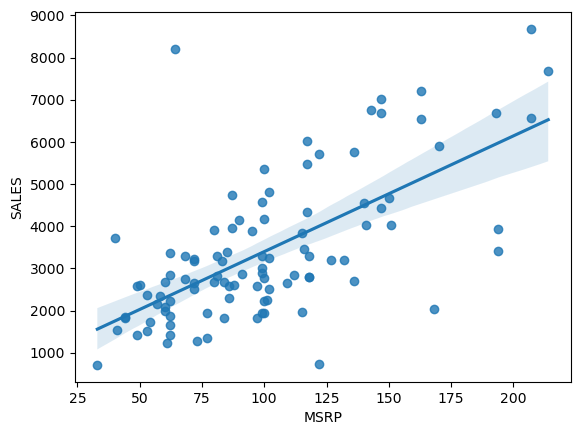

In [442]:
sns.regplot(x = 'MSRP', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U8'), dtype('float64')) -> None

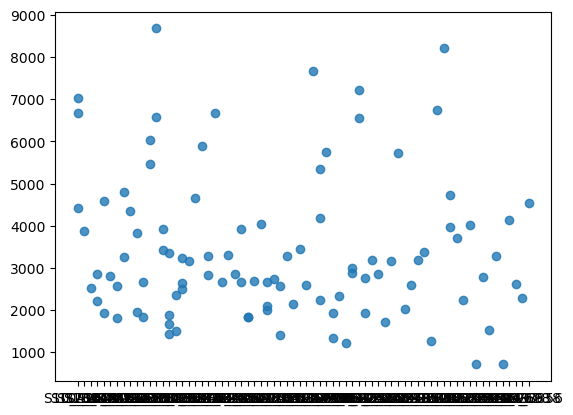

In [443]:
sns.regplot(x = 'PRODUCTCODE', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U14'), dtype('float64')) -> None

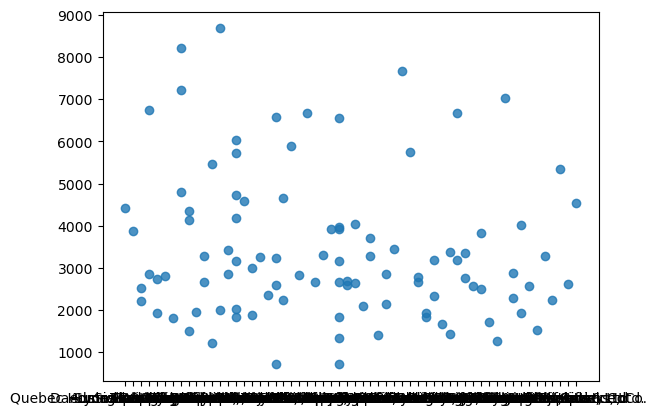

In [444]:
sns.regplot(x = 'CUSTOMERNAME', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U12'), dtype('float64')) -> None

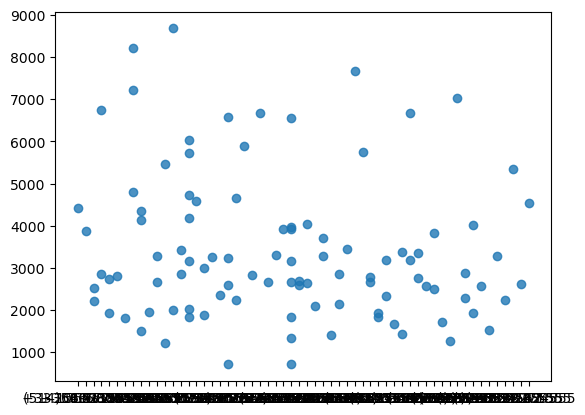

In [445]:
sns.regplot(x = 'PHONE', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U21'), dtype('float64')) -> None

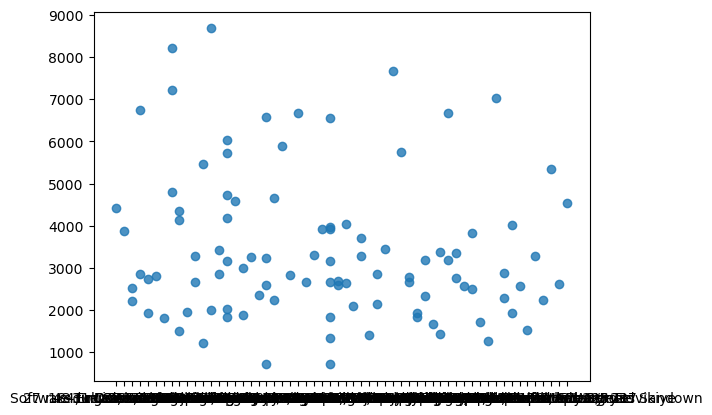

In [446]:
sns.regplot(x = 'ADDRESSLINE1', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U7'), dtype('float64')) -> None

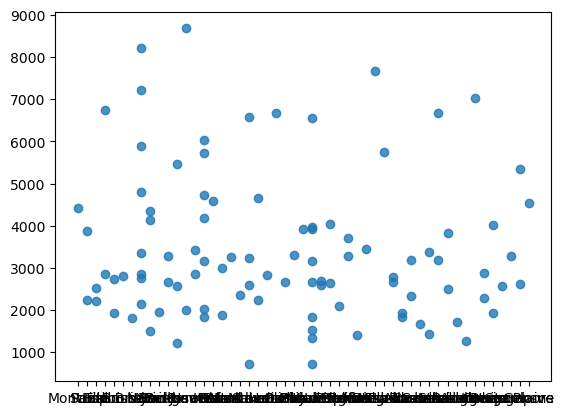

In [447]:
sns.regplot(x = 'CITY', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

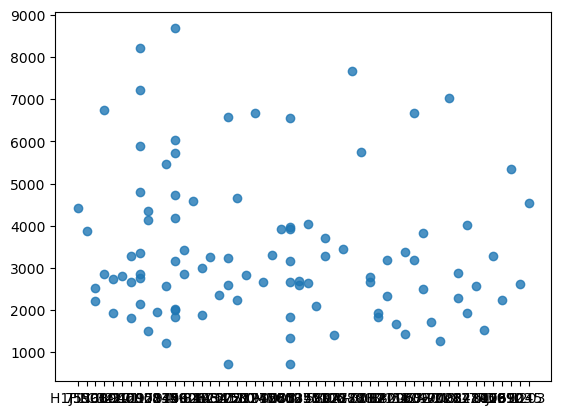

In [448]:
sns.regplot(x = 'POSTALCODE', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U8'), dtype('float64')) -> None

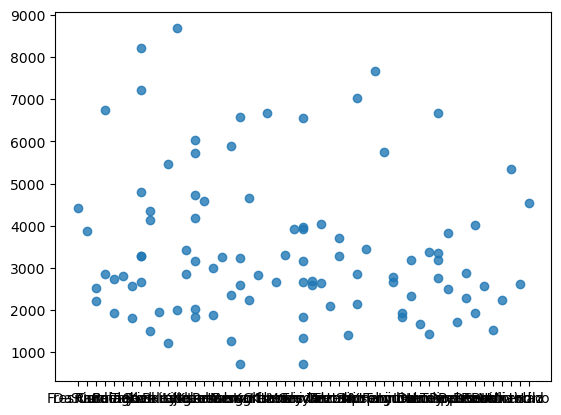

In [449]:
sns.regplot(x = 'CONTACTLASTNAME', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U6'), dtype('float64')) -> None

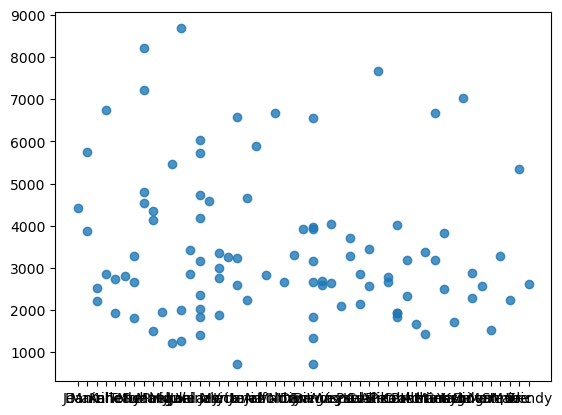

In [450]:
sns.regplot(x = 'CONTACTFIRSTNAME', y = 'SALES', data = dfsns);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

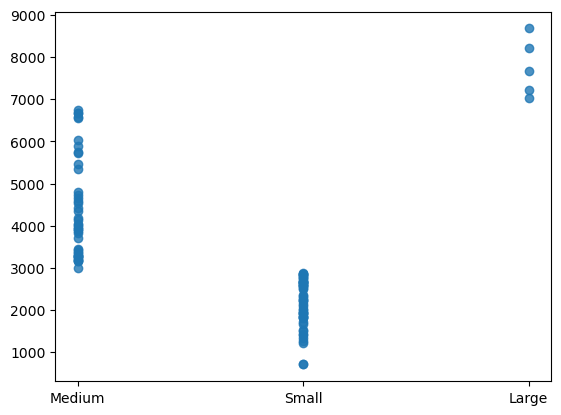

In [451]:
sns.regplot(x = 'DEALSIZE', y = 'SALES', data = dfsns);

In [452]:
cor = dfsns.corr()
cor

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.123375,-0.079577,0.054809,0.112199,0.041313,0.075548,0.910997,0.078051
QUANTITYORDERED,0.123375,1.000000,-0.077415,-0.115465,0.469240,-0.048611,-0.034721,0.134708,-0.079903
PRICEEACH,-0.079577,-0.077415,1.000000,0.034280,0.632830,0.127635,0.114187,-0.105352,0.627848
ORDERLINENUMBER,0.054809,-0.115465,0.034280,1.000000,-0.020424,0.047810,0.032830,0.042140,0.094842
SALES,0.112199,0.469240,0.632830,-0.020424,1.000000,0.103910,0.113658,0.076037,0.658027
QTR_ID,0.041313,-0.048611,0.127635,0.047810,0.103910,1.000000,0.975937,-0.346552,0.076877
MONTH_ID,0.075548,-0.034721,0.114187,0.032830,0.113658,0.975937,1.000000,-0.323801,0.093540
YEAR_ID,0.910997,0.134708,-0.105352,0.042140,0.076037,-0.346552,-0.323801,1.000000,0.046946
MSRP,0.078051,-0.079903,0.627848,0.094842,0.658027,0.076877,0.093540,0.046946,1.000000


In [453]:
figure = ff.create_annotated_heatmap(
    z=cor.values,
    x=list(cor.columns),
    y=list(cor.index),
    annotation_text=cor.round(2).values,
    showscale=True)
figure.show()

In [454]:
dfsns.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [455]:
X = dfsns.drop(['ORDERNUMBER','ORDERLINENUMBER','SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'], axis = 1) #Features
y = dfsns['SALES'] #Labels

print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(100, 3)
(100,)


In [456]:
scale = StandardScaler()
scaledX = scale.fit_transform(X)
scaledX

array([[-7.58634895e-01,  8.53867881e-01,  1.14860334e+00],
       [ 7.73960852e-01,  5.77460407e-01, -1.23003509e-01],
       [-1.30599052e+00,  8.53867881e-01,  4.81743364e-02],
       [-2.11279271e-01,  2.82135310e-01, -9.29984778e-01],
       [-1.30599052e+00,  2.10143249e-01, -2.51875972e-02],
       [-1.19651939e+00,  8.53867881e-01,  4.39437982e-01],
       [-1.52493277e+00,  3.58331287e-01, -7.40955529e-02],
       [ 5.55018603e-01,  8.53867881e-01,  4.81743364e-02],
       [-1.01808146e-01,  8.53867881e-01,  4.14984004e-01],
       [-1.41546164e+00,  5.00738940e-01,  3.66076048e-01],
       [-7.58634895e-01,  7.92911100e-01, -3.91997265e-01],
       [ 1.43078760e+00,  8.53867881e-01,  4.14984004e-01],
       [ 2.26605228e-01,  8.53867881e-01,  2.61584201e+00],
       [ 1.21184535e+00, -4.07306908e-01,  2.29794030e+00],
       [ 1.54025873e+00,  8.53867881e-01,  4.14984004e-01],
       [ 1.21184535e+00,  8.53867881e-01, -2.51875972e-02],
       [ 3.36076353e-01, -1.74257572e+00

In [457]:
X_train, X_test, y_train, y_test = tt(scaledX,y, test_size=0.20, random_state=40)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80, 3) (80,)
(20, 3) (20,)


In [458]:
scaler = MinMaxScaler()

scl = dfsns[['QUANTITYORDERED','PRICEEACH','MSRP']] = scaler.fit_transform(dfsns[['QUANTITYORDERED','PRICEEACH','MSRP']])
scl

array([[0.23333333, 1.        , 0.62983425],
       [0.7       , 0.91922604, 0.34254144],
       [0.06666667, 1.        , 0.38121547],
       [0.4       , 0.83292383, 0.16022099],
       [0.06666667, 0.81188575, 0.36464088],
       [0.1       , 1.        , 0.46961326],
       [0.        , 0.85519042, 0.35359116],
       [0.63333333, 1.        , 0.38121547],
       [0.43333333, 1.        , 0.4640884 ],
       [0.03333333, 0.8968059 , 0.45303867],
       [0.23333333, 0.98218673, 0.28176796],
       [0.9       , 1.        , 0.4640884 ],
       [0.53333333, 1.        , 0.96132597],
       [0.83333333, 0.63144963, 0.88950276],
       [0.93333333, 1.        , 0.4640884 ],
       [0.83333333, 1.        , 0.36464088],
       [0.56666667, 0.24124693, 0.16022099],
       [0.46666667, 0.93166462, 0.38121547],
       [0.7       , 0.35012285, 0.11049724],
       [0.76666667, 0.61870393, 0.21546961],
       [0.56666667, 0.7779484 , 0.27624309],
       [0.2       , 1.        , 0.64640884],
       [0.

In [459]:
LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [460]:
pred = LR.predict(X_test)

score = LR.score(X_test,y_test)
score

0.9207267238751505

In [461]:
print(LR.coef_)
print(LR.intercept_)

[869.32825424 672.26925373 755.44959885]
3422.1586745085438


In [462]:
LR.coef_[0]*500+LR.coef_[1]*5+LR.coef_[2]*0.2+LR.intercept_

441598.72198489925

In [463]:
error = mt.mean_squared_error(y_test, pred)
rmse = np.sqrt(error)
print('Root MSE :', rmse)

mt.r2_score(y_test, pred)

Root MSE : 487.76612109912907


0.9207267238751505

In [464]:
LR2 = linear_model.LinearRegression()
cv_results = cross_val_score(LR2, scaledX, y, cv=5)
print('Cross Validation Results\t: ', cv_results)
average_score = np.mean(cv_results)
print('Avg. Score\t\t\t: ', average_score)

Cross Validation Results	:  [0.71799284 0.72104015 0.87377827 0.68979997 0.80254184]
Avg. Score			:  0.7610306121230559


In [465]:
lasso = linear_model.Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)
lasso_predict = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.9207251483216844

In [466]:
sgdr = SGDRegressor(random_state = 1, penalty = None, eta0=.0001, max_iter=1000)
grid_param = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}
gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(scaledX, y)

results = pd.DataFrame.from_dict(gd_sr.cv_results_)
print("Cross-validation results:\n", results)

best_parameters = gd_sr.best_params_
print("\nBest parameters\t: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result\t: ", best_result)

best_model = gd_sr.best_estimator_
print("Intercept\t: ", best_model.intercept_)

sgdr.fit(scaledX,y)
print('Intercept\t:', sgdr.intercept_)
print('score\t\t:', sgdr.score(scaledX, y))
print('\n', pd.DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'], ascending=False))
print('\n\nSGDR Score\t: ', sgdr.score(scaledX, y))

C:\Users\vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceW

Cross-validation results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta0  \
0        0.128122  1.485545e-02         0.001001    6.324904e-04     0.0001   
1        0.245855  1.037158e-02         0.001597    4.871608e-04     0.0001   
2        0.340600  1.176481e-02         0.000801    4.007139e-04     0.0001   
3        0.424153  9.368984e-02         0.001201    3.992145e-04     0.0001   
4        0.024985  1.405498e-03         0.000801    4.005221e-04      0.001   
5        0.022384  4.880294e-03         0.001202    9.794166e-04      0.001   
6        0.022383  2.937239e-03         0.001002    7.599534e-07      0.001   
7        0.021185  2.480192e-03         0.000801    4.005929e-04      0.001   
8        0.001998  6.217196e-07         0.000998    4.909339e-07       0.01   
9        0.002598  4.894733e-04         0.000799    3.997330e-04       0.01   
10       0.001999  3.873843e-07         0.000998    6.975526e-07       0.01   
11       0.001998  5.2234

C:\Users\vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\vaibhav\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [467]:
best_model.coef_[0]*500+best_model.coef_[1]*5+best_model.coef_[2]*0.2+sgdr.intercept_

array([461535.42222323])